#### Notebook by Bruno Pasini

github.com/brunompasini

In [2]:
#from google.colab import files
#uploaded = files.upload()

## Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

## Reading Data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
x_train = train.drop(['label'], axis=1)
y_train = train['label']

## Normalizing and Reshaping

In [5]:
x_train = x_train/255.0
test = test/255.0

In [6]:
x_train.shape
# images are 28x28 but are 784 px in line
# and another dimension bc they are in grayscale

x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

x_train.shape

(42000, 28, 28, 1)

## Callbacks class



In [13]:
class AccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epock,logs={}):
        if (logs.get('accuracy')>=0.999):
            print("\nAccuracy is over 99.9%")
            self.model.stop_training = True


accuracy_callback = AccuracyCallback()
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.2, patience=5 ,min_lr = 0.000001, verbose=1)
            
callbacks = [accuracy_callback, reduce_lr]

# My CNN Model

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

## Data Augmentation

In [15]:
from keras.preprocessing.image import ImageDataGenerator

datag = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3
    )

datag.fit(x_train)

## Training

In [16]:
history = model.fit(datag.flow(x_train, y_train, batch_size=100), epochs=32, callbacks=callbacks)

Epoch 1/32
420/420 [==============================] - 32s 21ms/step - loss: 0.9750 - accuracy: 0.6765
Epoch 2/32
420/420 [==============================] - 9s 21ms/step - loss: 0.2165 - accuracy: 0.9341
Epoch 3/32
420/420 [==============================] - 9s 21ms/step - loss: 0.1580 - accuracy: 0.9524
Epoch 4/32
420/420 [==============================] - 9s 20ms/step - loss: 0.1235 - accuracy: 0.9609
Epoch 5/32
420/420 [==============================] - 9s 20ms/step - loss: 0.0992 - accuracy: 0.9687
Epoch 6/32
420/420 [==============================] - 9s 21ms/step - loss: 0.0946 - accuracy: 0.9699
Epoch 7/32
420/420 [==============================] - 9s 21ms/step - loss: 0.0874 - accuracy: 0.9727
Epoch 8/32
420/420 [==============================] - 9s 21ms/step - loss: 0.0838 - accuracy: 0.9738
Epoch 9/32
420/420 [==============================] - 9s 21ms/step - loss: 0.0759 - accuracy: 0.9763
Epoch 10/32
420/420 [==============================] - 9s 21ms/step - loss: 0.0697 - accur

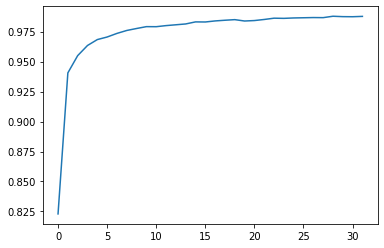

In [17]:
plt.plot(history.history['accuracy'])

## Prediction

In [18]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_kaggle.csv",index=False)

In [ ]:
# 0.9884 in training
# got a 0.99317 score on kaggle

# LeNet-5 model

LeNet-5 is a neural network from a 1998 article, I adapted it a little and resulted in this model
- The original had a 32x32 input, achieved using padding
- Changed average pooling to max pooling
- Added dropout

In [ ]:
Le5Net_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(16, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(120, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10, activation='softmax')
])
Le5Net_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
Le5Net_model.summary()

## Data Augmentation

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator

datag = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3
    )

datag.fit(x_train)

## Training

In [ ]:
history = Le5Net_model.fit(datag.flow(x_train, y_train, batch_size=100), epochs=32, callbacks=[callbacks])

In [ ]:
plt.plot(history.history['accuracy'])

## Prediction

In [ ]:
results = Le5Net_model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("lenet5_mnist_kaggle.csv",index=False)

In [ ]:
files.download('lenet5_mnist_kaggle.csv')

In [ ]:
# 0.9703 in training
# got a 0.99007 score on kaggle

## Autoencoder

In [6]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
test = test.reshape((len(test), np.prod(test.shape[1:])))

formato_entrada = 28*28
formato_encoder = 392
entrada = keras.Input(shape=formato_entrada)
encoder = keras.layers.Dense(formato_encoder, activation='relu')(entrada)
saida = keras.layers.Dense(formato_entrada, activation='sigmoid')(encoder)
autoencoder = keras.Model(entrada, saida)


oencoder = keras.Model(entrada, encoder)
encoded_input = keras.Input(shape=(formato_encoder,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))




autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/10
165/165 [==============================] - 2s 4ms/step - loss: 0.2913
Epoch 2/10
165/165 [==============================] - 1s 5ms/step - loss: 0.1073
Epoch 3/10
165/165 [==============================] - 1s 5ms/step - loss: 0.0856
Epoch 4/10
165/165 [==============================] - 1s 4ms/step - loss: 0.0771
Epoch 5/10
165/165 [==============================] - 1s 4ms/step - loss: 0.0731
Epoch 6/10
165/165 [==============================] - 1s 4ms/step - loss: 0.0710
Epoch 7/10
165/165 [==============================] - 1s 3ms/step - loss: 0.0694
Epoch 8/10
165/165 [==============================] - 1s 3ms/step - loss: 0.0682
Epoch 9/10
165/165 [==============================] - 0s 3ms/step - loss: 0.0676
Epoch 10/10
165/165 [==============================] - 1s 3ms/step - loss: 0.0669


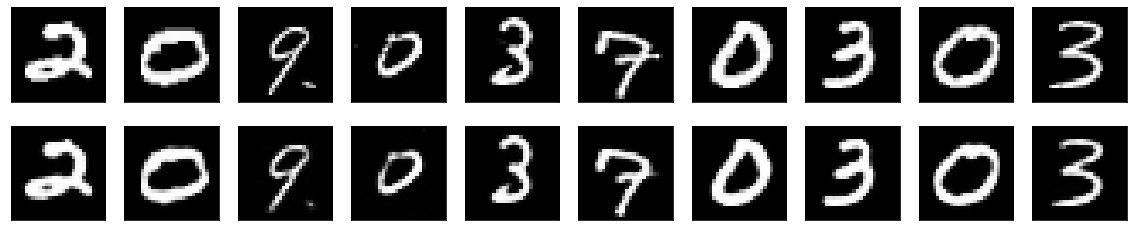

In [7]:
encoded_imgs = oencoder.predict(test)
decoded_imgs = decoder.predict(encoded_imgs)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
